In [1]:
from google.colab import drive
drive.mount('/content/project')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/project


In [12]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [19]:
hasoc = pd.read_pickle("/content/project/My Drive/Doutorado/2020.1/Mineração de dados/Projeto/preprocessed_pos_hasoc")
hs = pd.read_pickle("/content/project/My Drive/Doutorado/2020.1/Mineração de dados/Projeto/preprocessed_pos_hs")
mlma = pd.read_pickle("/content/project/My Drive/Doutorado/2020.1/Mineração de dados/Projeto/preprocessed_pos_mlma")

In [5]:
hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         2556 non-null   int64 
 1   text               2556 non-null   object
 2   label              2556 non-null   object
 3   tidy_tweet         2556 non-null   object
 4   tidy_tweet_tokens  2556 non-null   object
 5   tokens_no_stop     2556 non-null   object
dtypes: int64(1), object(5)
memory usage: 119.9+ KB


In [6]:
offensive_df = hs[~hs.label.isin(['none','normal','NOT'])]
offensive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 1477
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         554 non-null    int64 
 1   text               554 non-null    object
 2   label              554 non-null    object
 3   tidy_tweet         554 non-null    object
 4   tidy_tweet_tokens  554 non-null    object
 5   tokens_no_stop     554 non-null    object
dtypes: int64(1), object(5)
memory usage: 30.3+ KB


# HS

(-0.5, 799.5, 399.5, -0.5)

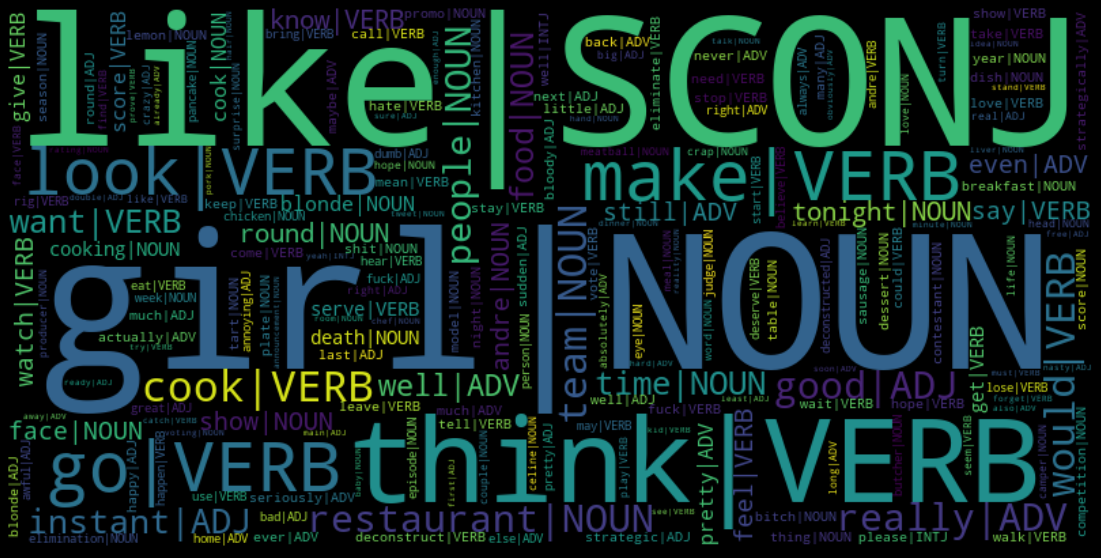

In [20]:
flat_list = [item for sublist in hs['tokens_no_stop'].values for item in sublist]

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(Counter(flat_list))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")